In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from datetime import datetime


# Load data

## df_user

In [10]:
### load data
df_user = pd.read_csv('user_table.csv')
df_user.head()

,user_id,signup_date
0,34,2015-01-01
1,59,2015-01-01
2,178,2015-01-01
3,285,2015-01-01
4,383,2015-01-01


In [12]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
user_id        100000 non-null int64
signup_date    100000 non-null object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [9]:
### any duplicates?
df_user[df_user.duplicated()]

,user_id,signup_date


In [24]:
### check if the date is consecutive
user_time = df_user.groupby('signup_date').count().reset_index()
dates = [datetime.strptime(d, "%Y-%m-%d") for d in user_time['signup_date']]

date_ints = set([d.toordinal() for d in dates])

if len(date_ints) == 1:
    print ("unique")
elif max(date_ints) - min(date_ints) == len(date_ints) - 1:
    print ("consecutive")
else:
    print ("not consecutive")

consecutive


In [25]:
print("max date is",user_time['signup_date'].max())
print("min date is",user_time['signup_date'].min())

max date is 2015-08-31
min date is 2015-01-01


**<font color='blue'>df_user includes user_id info with their signup date. With 100,000 users in total and no duplicates. All users are signed up between 2015-01-01 and 2015-08-31**

## df_test

In [11]:
df_test = pd.read_csv('test_table.csv')
df_test.head()

,user_id,date,browser,test,pages_visited
0,600597,2015-08-13,IE,0,2
1,4410028,2015-08-26,Chrome,1,5
2,6004777,2015-08-17,Chrome,0,8
3,5990330,2015-08-27,Safari,0,8
4,3622310,2015-08-07,Firefox,0,1


In [26]:
### duplicated?
df_test[df_test.duplicated()]

,user_id,date,browser,test,pages_visited


In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
user_id          100000 non-null int64
date             100000 non-null object
browser          100000 non-null object
test             100000 non-null int64
pages_visited    100000 non-null int64
dtypes: int64(3), object(2)
memory usage: 3.8+ MB


In [32]:
### check if the date is consecutive
user_time = df_test.groupby('date').count()['user_id'].reset_index()
dates = [datetime.strptime(d, "%Y-%m-%d") for d in user_time['date']]

date_ints = set([d.toordinal() for d in dates])

if len(date_ints) == 1:
    print ("unique")
elif max(date_ints) - min(date_ints) == len(date_ints) - 1:
    print ("consecutive")
else:
    print ("not consecutive")

consecutive


In [28]:
print("max date is",df_test['date'].max())
print("min date is",df_test['date'].min())

max date is 2015-08-31
min date is 2015-08-01


In [99]:
### are those unique user?
print("if the result is true, the user_id are unique with no duplicates -->", df_test['user_id'].nunique() == df_test.shape[0])

if the result is true, the user_id are unique with no duplicates --> True


**<font color='blue'>df_test includes test info with control and experiment group. With 100,000 users in total and no duplicates. This test is in August 2015**

## Merge Data

In [36]:
df_merge = df_test.merge(df_user,on='user_id',how='left')
df_merge.head()

,user_id,date,browser,test,pages_visited,signup_date
0,600597,2015-08-13,IE,0,2,2015-01-19
1,4410028,2015-08-26,Chrome,1,5,2015-05-11
2,6004777,2015-08-17,Chrome,0,8,2015-06-26
3,5990330,2015-08-27,Safari,0,8,2015-06-25
4,3622310,2015-08-07,Firefox,0,1,2015-04-17


In [38]:
###check lenth before and after merge
print("dataframe is right after merging if it is true-->", df_merge.shape[0] == df_test.shape[0])

dataframe is right after merging if it is true--> True


In [39]:
#### check if there is NA
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 6 columns):
user_id          100000 non-null int64
date             100000 non-null object
browser          100000 non-null object
test             100000 non-null int64
pages_visited    100000 non-null int64
signup_date      100000 non-null object
dtypes: int64(3), object(3)
memory usage: 5.3+ MB


In [44]:
##### signup_date column is the date the user signed up, so column date will be later than it. Let's check. 
df_check_time = df_merge.copy()
df_check_time['check_time'] = df_merge['date']>=df_merge['signup_date']
df_check_time[df_check_time['check_time'] != True]

,user_id,date,browser,test,pages_visited,signup_date,check_time


In [130]:
df_merge.groupby('test').count()

,user_id,date,browser,pages_visited,signup_date
test,,,,,
0,48737,48737,48737,48737,48737
1,49136,49136,49136,49136,49136


# Explore Data

Text(761.8522727272725, 0.5, ' pageviews')

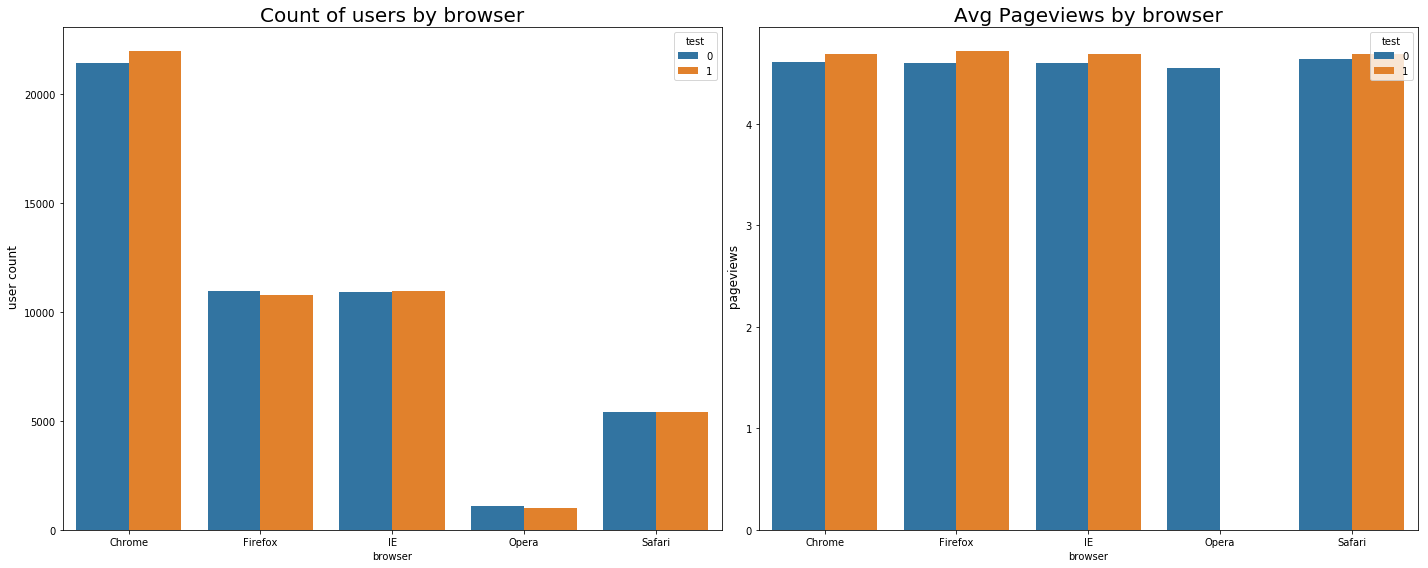

In [90]:
df1 = df_merge.groupby(['test','browser']).count()['user_id'].reset_index()
df2 = df_merge.groupby(['test','browser']).mean()['pages_visited'].reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.barplot(x='browser', y="user_id", hue='test', data=df1, ax=ax[0])
ax[0].set_title('Count of users by browser', fontsize=20)
#ax[0].set_yscale('log')
ax[0].set_ylabel(' user count', fontsize=12)
#ax[0].set_xticklabels(labels=df_breakdown['source'], rotation=45)
plt.tight_layout()
############ metrics, which one is higher bt control and exp group. They should follow the same trend

sns.barplot(x='browser', y="pages_visited", hue='test', data=df2, ax=ax[1])
ax[1].set_title('Avg Pageviews by browser', fontsize=20)
#ax[1].set_yscale('log')
ax[1].set_ylabel(' pageviews', fontsize=12)

#ax[1].set_xticklabels(labels=df_breakdown['source'].unique(), rotation=45)
######## The percentage of each category should be the same between control and exp group

<font color='blue'> Opera browser has the least number of user and the least avg pageviews

<font color='blue'> Count of users are about evenly split between test and control group    

<font color='blue'> The avgerage pageviews in experiment group are higher than control group, but just a little big.

<font color='blue'> No record for the avg pageviews of experiment group. Could caused by very few number of user with no many pageviews
    


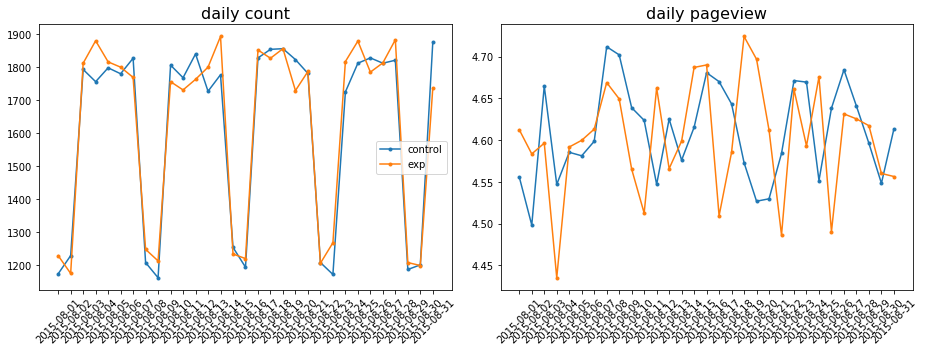

In [86]:
control_count = df_merge[df_merge['test'] == 0].groupby(['test','date']).count()['user_id'].reset_index()
test_count = df_merge[df_merge['test'] == 1].groupby(['test','date']).count()['user_id'].reset_index()

control_avg = df_merge[df_merge['test'] == 0].groupby(['test','date']).mean()['pages_visited'].reset_index()
test_avg = df_merge[df_merge['test'] == 1].groupby(['test','date']).mean()['pages_visited'].reset_index()

## time
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13, 5))
ax[0].plot(control_count['date'],control_count['user_id'],'.-',label = 'control')
ax[0].plot(test_count['date'],test_count['user_id'],'.-',label = 'exp')

ax[0].set_title('daily count',fontsize = 16)
#ax[0].set_xlabel('date')
#ax[0].set_ylabel('count')
ax[0].legend()
ax[0].set_xticklabels(labels=test_count['date'].unique(), rotation=45)


ax[1].plot(control_avg['date'],control_avg['pages_visited'],'.-',label = 'control')
ax[1].plot(test_avg['date'],test_avg['pages_visited'],'.-',label = 'exp')
ax[1].set_xticklabels(labels=test_avg['date'].unique(), rotation=45)
ax[1].set_title('daily pageview',fontsize = 16)

plt.tight_layout()
plt.show()

<font color='blue'> Daily count follows a very strong weekly pattern

<font color='blue'> The sample size split evenly between control and test group    

<font color='blue'> Average daily pageviews follows a strong patten within every 7 days

<font color='blue'> When daily pageviews of test group drops, it drops even more intense compared to control group

<font color='blue'> Can't tell which group has a higher pageviews by plot

    

# AB testing

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text yticklabel objects>)

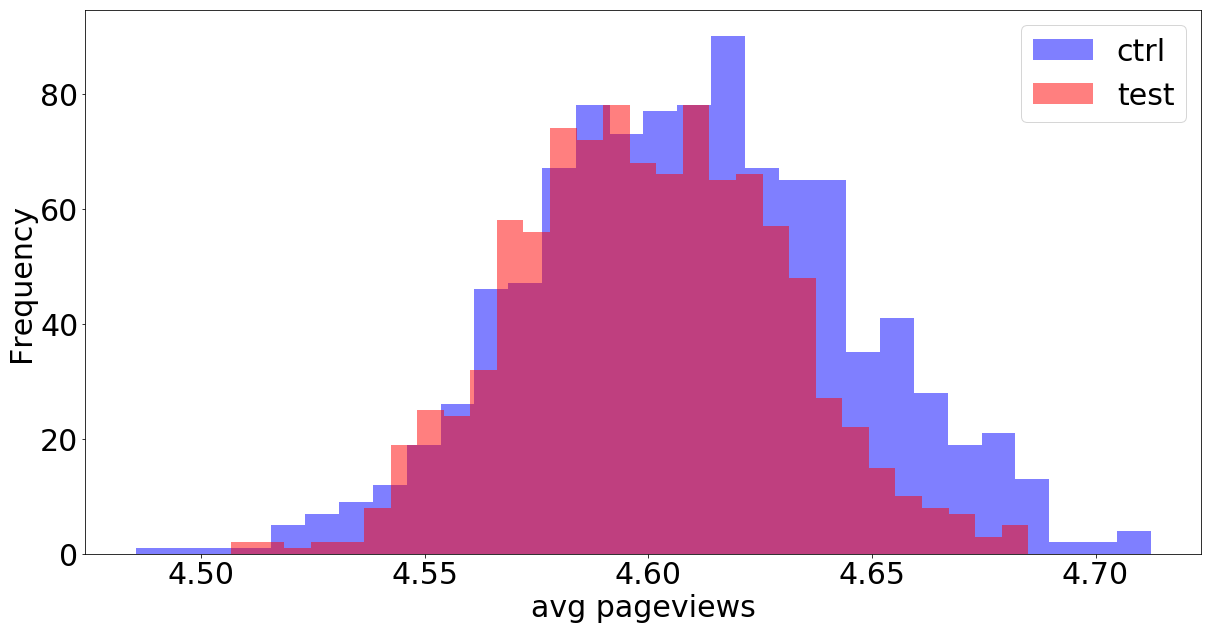

In [107]:
##split control group and test group
df_ctrl = df_merge[df_merge['test'] == 0]
df_exp = df_merge[df_merge['test'] == 1]


def expect_buyer_multiple(df, n):
    avg_pageviews = []
    for i in range(0,n):
        df2 = df.sample(frac=0.1, replace=False)
        avg_pageview = df2['pages_visited'].mean()
        avg_pageviews.append(avg_pageview)
        
    return avg_pageviews

exp_ctrl = expect_buyer_multiple(df_ctrl,1000)
exp_test = expect_buyer_multiple(df_exp,1000)




plt.figure(figsize=[20,10])
plt.hist(exp_ctrl,30, histtype='stepfilled', color='blue', alpha=0.50, label='ctrl')
plt.hist(exp_test,30, histtype='stepfilled', color='red', alpha=0.50, label='test')
plt.legend(loc='upper right', fontsize=30)
plt.xlabel('avg pageviews', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)


In [93]:
df_merge[['test','pages_visited']].groupby('test').mean()

,pages_visited
test,
0,4.608394
1,4.599693


**<font color='blue'> The sampling distribution of two groups are pretty the same, as well as the mean(pageviews) of two groups, which suggests the test may not be successful**
    
Let's run a two tail hypothesis test to see:

* H0: mean(control) = mean(test)
* H1: mean(control) <> mean(test)



In [95]:
Ttest_indResult = stats.ttest_ind(df_ctrl['pages_visited'], df_exp['pages_visited'], axis=0, equal_var=True)

if Ttest_indResult.pvalue > 0.05:
  print("fail to reject null H0")
elif Ttest_indResult.pvalue <= 0.05:
  print("reject H0")

fail to reject null H0


**<font color='blue'> The hypothesis test tells us the same result that: there is no significant difference between means of those two groups, which suggests the Remoomended Friends program is not successful**

# AB Test Segment check

## By browser

In [100]:
df_merge.head()

,user_id,date,browser,test,pages_visited,signup_date
0,600597,2015-08-13,IE,0,2,2015-01-19
1,4410028,2015-08-26,Chrome,1,5,2015-05-11
2,6004777,2015-08-17,Chrome,0,8,2015-06-26
3,5990330,2015-08-27,Safari,0,8,2015-06-25
4,3622310,2015-08-07,Firefox,0,1,2015-04-17


In [121]:
dimension = 'browser'
metrics = 'pages_visited'
raw_date = df_merge.copy()
#############################################################

dimension_list = raw_date[dimension].unique().tolist()
exp_means = []
control_means = []
diff_means = []
Pvalues = []
results = []
for i in browser_list:
    ##split control group and test group
    df_ctrl = raw_date[raw_date['test'] == 0]
    df_exp = raw_date[raw_date['test'] == 1]
    
    ## control group
    df_ctrl = df_ctrl[df_ctrl[dimension] == i]
    ## exp group
    df_exp = df_exp[df_exp[dimension] == i]
    ##mean
    exp_mean = df_exp[metrics].mean()  ####### mean is our metrics
    control_mean = df_ctrl[metrics].mean()  ####### mean is our metrics
    diff_mean = exp_mean-control_mean
    ##pvalue
    Ttest_indResult = stats.ttest_ind(df_exp[metrics], df_ctrl[metrics], axis=0, equal_var=True)
    Pvalue = Ttest_indResult.pvalue     ############## two tail test
    ##result
    if Pvalue > 0.05:
      result = "This diff is by chance"
    elif Pvalue <= 0.05:
      result = "OHYEAH! This diff is significant"
    
    exp_means.append(exp_mean)
    control_means.append(control_mean)
    diff_means.append(diff_mean)
    Pvalues.append(Pvalue)
    results.append(result)

d = {'browser': browser_list, 'exp_means': exp_means,
     'control_means': control_means, 'diff_means':diff_means,'Pvalues':Pvalues,'results':results}
df_dimension_pvalue = pd.DataFrame(data=d)
df_dimension_pvalue

,browser,exp_means,control_means,diff_means,Pvalues,results
0,IE,4.685985,4.598478,0.087507,0.007781,OHYEAH! This diff is significant
1,Chrome,4.690680,4.613341,0.077339,0.000913,OHYEAH! This diff is significant
2,Safari,4.692336,4.638180,0.054156,0.241212,This diff is by chance
3,Firefox,4.714259,4.600164,0.114095,0.000597,OHYEAH! This diff is significant
4,Opera,0.000000,4.546438,-4.546438,0.000000,OHYEAH! This diff is significant


**<font color='color'> Interesting observation: we see significant increase of pageview increase in brower: IE, Chrome, Firefox, which are the most used browser on our site, according to the data visualization. At this point, I would say the test is successful**

**<font color='color'> Also, it seems like each browser responded differently to the test. IE, Chrome, Firefox are successful in this test, compared to Opera which doesn't have any page_visited in the experiment group.**
    
* Any problem on the UI of Opera brower during the test?


# Updated AB test result check --- remove Opera browser

In [125]:
df_merge = df_merge[df_merge['browser']!= 'Opera']

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

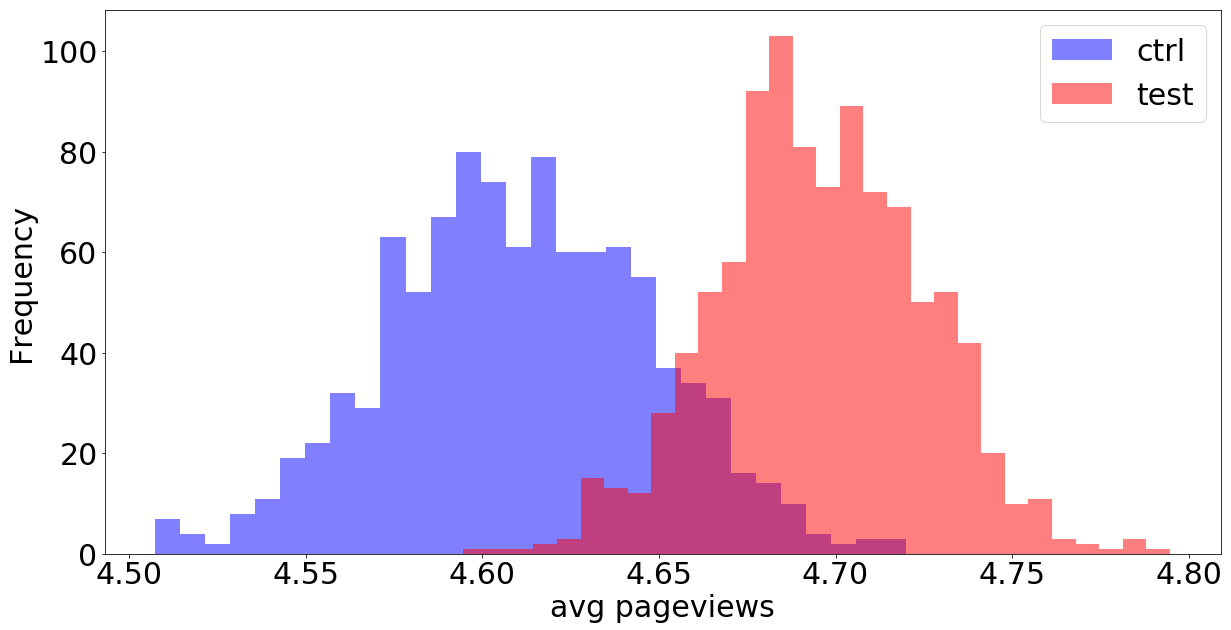

In [126]:
##split control group and test group
df_ctrl = df_merge[df_merge['test'] == 0]
df_exp = df_merge[df_merge['test'] == 1]


def expect_buyer_multiple(df, n):
    avg_pageviews = []
    for i in range(0,n):
        df2 = df.sample(frac=0.1, replace=False)
        avg_pageview = df2['pages_visited'].mean()
        avg_pageviews.append(avg_pageview)
        
    return avg_pageviews

exp_ctrl = expect_buyer_multiple(df_ctrl,1000)
exp_test = expect_buyer_multiple(df_exp,1000)




plt.figure(figsize=[20,10])
plt.hist(exp_ctrl,30, histtype='stepfilled', color='blue', alpha=0.50, label='ctrl')
plt.hist(exp_test,30, histtype='stepfilled', color='red', alpha=0.50, label='test')
plt.legend(loc='upper right', fontsize=30)
plt.xlabel('avg pageviews', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)


In [127]:
df_merge[['test','pages_visited']].groupby('test').mean()

,pages_visited
test,
0,4.609804
1,4.694989


* H0: mean(control) >= mean(test)
* H1: mean(control) < mean(test)

In [128]:
Ttest_indResult = stats.ttest_ind(df_ctrl['pages_visited'], df_exp['pages_visited'], axis=0, equal_var=True)

if Ttest_indResult.pvalue/2 > 0.05:
  print("fail to reject null H0")
elif Ttest_indResult.pvalue/2 <= 0.05:
  print("reject H0")

reject H0


**<font color='color'>Result: Ater removing one issue browser, the rest of the data points shows the program did increase the pageview per session by 0.09. However, this increase is very small and it is not even one pageview, I will talk with the product manager and the engineer to see if it is even worth to launch.**
    